# 신경망 모델
- 이진 분류 : 유방암 예측 사례

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [13]:
df.shape

(569, 31)

### 1. 데이터를 정규/표준화 하지 않은 경우

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, test_size = 0.2, stratify = cancer.target, random_state = 2022
)

- 모델 정의

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   # Fully Connected Network


In [25]:
model = Sequential([
        Dense(100,input_shape = (30,), activation = "relu"),
        Dense(24, activation = "relu"),
        Dense(1, activation="sigmoid")
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정(컴파일)

In [26]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100,
          batch_size = 100)


- 모델 평가

In [28]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2403 - accuracy: 0.9123


[0.24031399190425873, 0.9122806787490845]

- 훈련과정 시각화 : epoch에 따른 accuracy, val_loss 의 변화

In [31]:
y_acc = history.history["accuracy"]
y_vloss = history.history[ "val_loss"]
xs = np.arange(1, len(y_acc) + 1)

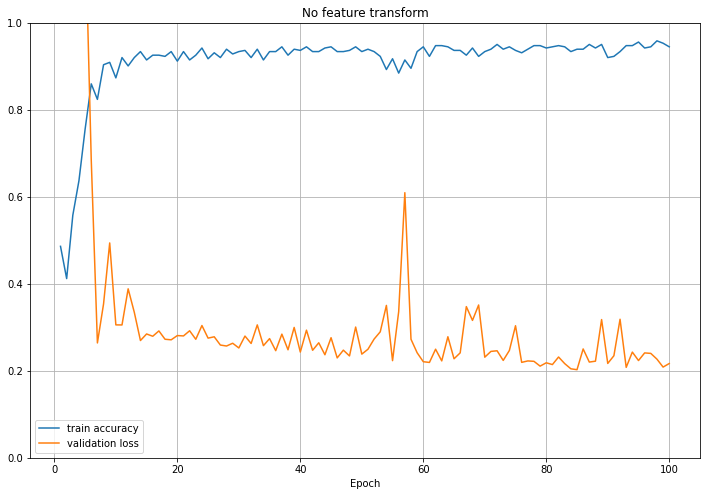

In [33]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_acc, label = "train accuracy")
plt.plot(xs, y_vloss, label = "validation loss")
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel("Epoch")
plt.title("No feature transform")
plt.show()

### 2. 데이터를 정규/표준화한 경우

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [38]:
cancer_std = StandardScaler().fit_transform(cancer.data)

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, test_size = 0.2, stratify = cancer.target, random_state = 2022
)



- 모델정의

In [46]:
model2 = Sequential()
model2.add(Dense(100, input_dim = 30, activation = "relu"))
model2.add(Dense(24, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               3100      
                                                                 
 dense_13 (Dense)            (None, 24)                2424      
                                                                 
 dense_14 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정

In [47]:
model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

- 모델 학습

In [ ]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2,
                   epochs = 100, batch_size=100)


In [50]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.9825


[0.08632954210042953, 0.9824561476707458]

- 학습과정 시각화

In [51]:
y_acc2 = hist2.history["accuracy"]
y_vloss2 = hist2.history["val_loss"]
xs = np.arange(1, len(y_acc) + 1)

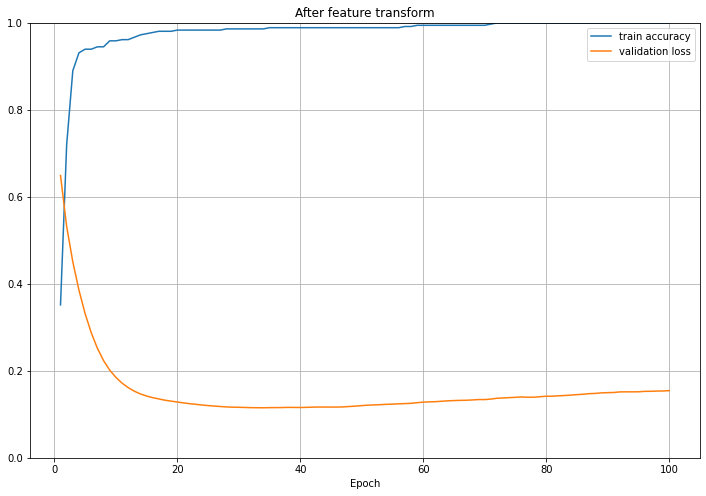

In [52]:
plt.figure(figsize = (12,8))
plt.plot(xs, y_acc2, label = "train accuracy")
plt.plot(xs, y_vloss2, label = "validation loss")
plt.legend(), plt.grid()
plt.ylim([0,1])
plt.xlabel("Epoch")
plt.title("After feature transform")
plt.show()